In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# EDA

In [4]:
titanic_df.dtypes.value_counts()

,count
object,5
int64,4
float64,2
bool,2
category,1
category,1


In [5]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
columns_to_drop = ['fare','embarked','class','who','adult_male','deck','embark_town','alive','alone']
titanic_df.drop(columns_to_drop,axis='columns',inplace=True)
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#CODFIFICACION DE VARIABLES CATEGORICAS

In [7]:
titanic_df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64


In [8]:
titanic_df = pd.get_dummies(titanic_df,columns=['sex'],drop_first = True)
titanic_df.head()

,survived,pclass,age,sibsp,parch,sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True


In [9]:
titanic_df['sex_male'] = titanic_df['sex_male'].astype(int)
titanic_df.rename(columns = {'sex_male':'sex'},inplace=True)
titanic_df.head()

,survived,pclass,age,sibsp,parch,sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [12]:
titanic_df.shape

(891, 6)

# ENTRENAMIENTO USANDO ARBOLES DE DECISIÓN

## PASO 1 - SEPARAMOS DATASET EN VARIABLES INDEPENDIENTE Y DEPENDIENTE (X Y)

In [10]:
X = titanic_df.drop("survived",axis=1)
y = titanic_df.survived

print(X)
print(y)

     pclass   age  sibsp  parch  sex
0         3  22.0      1      0    1
1         1  38.0      1      0    0
2         3  26.0      0      0    0
3         1  35.0      1      0    0
4         3  35.0      0      0    1
..      ...   ...    ...    ...  ...
886       2  27.0      0      0    1
887       1  19.0      0      0    0
888       3   NaN      1      2    0
889       1  26.0      0      0    1
890       3  32.0      0      0    1

[891 rows x 5 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


## PASO 2 - DIVIDIR DATASETS EN ENTRENAMIENTO Y TEST

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state= 00000)

## PASO 3 - CREAR MODELO DE ARBOL DE DECISIÓN

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2,random_state=00000)

## PASO 4 - APLICAMOS EL MODELO PARA ENTRENAR NUESTRO DATASET

In [14]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

# EVALUAMOS EL MODELO

In [15]:
from sklearn.metrics import accuracy_score

y_test_pred = tree.predict(X_test)

test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'El accuracy es : {test_accuracy}')

El accuracy es : 0.7873134328358209


## VERIFICAMOS EL FEATURE MAS IMPORTANTE

In [17]:
importances = tree.feature_importances_
importances

array([0.00715448, 0.        ,        nan, 0.        , 0.1404436 ])

In [18]:
columns = X.columns
columns

Index(['pclass', 'age', 'sibsp', 'parch', 'sex'], dtype='object')

<ipython-input-20-8bbb718d67bc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)


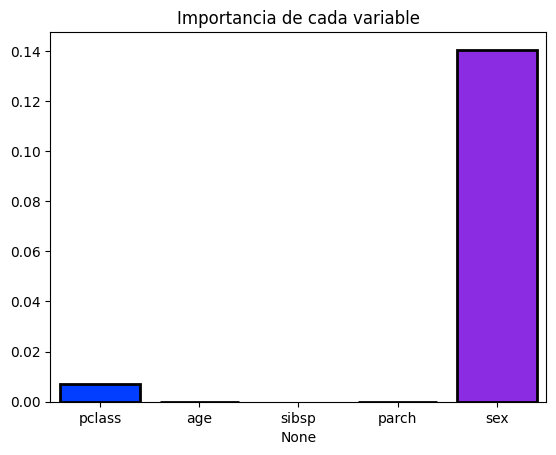

In [20]:
sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada variable')
plt.show()